## **Lab 2-4: Economic Dispatch of Generators in a Power System**
### **Integer Programming Approach using Python**

---

## **Lab Overview**

This **Python-based Jupyter Notebook** helps you understand **economic dispatch using Integer Programming (IP)**. Our objective is to find the best way to **distribute power generation** among multiple generators at the **lowest cost** while ensuring that the **total power demand is met**.

Unlike **Linear Programming (LP)** and **Quadratic Programming (QP)**, where power generation is treated as a continuous variable, **Integer Programming (IP)** requires power to be allocated in **fixed discrete blocks** (e.g., 10 MW). This approach is **more realistic for practical power dispatch**, where generation units can only operate in **specific increments**.

We use **Integer Programming (IP)**, a mathematical optimization method that **minimizes fuel costs while ensuring integer power allocations**.

---

### **In this Lab, We Will Learn:**
- How to **model power generation as integer variables**.
- How to **set up constraints** to ensure demand is met.
- How to **use Python’s `scipy.optimize.milp` function** to solve the **Integer Programming problem**.

 **By the end of this lab, you will be able to optimize power dispatch using an integer-based model!**



---

## **Step 1: Install Required Libraries**

Before running the code, ensure you have the necessary packages installed.

```python
!pip install numpy
!pip install -U matplotlib
!pip install scipy
```

Now, import the required libraries.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import milp, LinearConstraint
```

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import milp, LinearConstraint

---

## **Step 2: Define Generator Data**

Each generator operates in **fixed block increments** of **10 MW**:
- **Decision variable**: Number of **blocks** assigned to each generator.
- **Fuel Cost per MW** → Converted to **cost per block**.
- **Minimum and Maximum Power Output** → Converted to **minimum and maximum blocks**.
- **Total Power Demand** → Converted to **total required blocks**.


In [2]:
# Number of generators
num_generators = 3

# Fuel cost per MW for each generator ($/MW)
fuel_cost = np.array([10, 12, 9])

# Minimum and maximum power each generator can produce (MW)
P_min = np.array([50, 60, 40])
P_max = np.array([200, 180, 150])

# Total power demand (MW)
P_demand = 400

# Block size (MW)
block_size = 10

# Convert fuel cost to cost per block
block_cost = fuel_cost * block_size  # Example: if fuel_cost[i] = 10, then per 10MW block = 10*10 = 100

# Compute minimum and maximum number of blocks per generator
min_blocks = np.ceil(P_min / block_size).astype(int)  # Example: 50/10 = 5 blocks
max_blocks = np.floor(P_max / block_size).astype(int)  # Example: 200/10 = 20 blocks

# Total number of blocks required to meet demand
total_blocks = P_demand // block_size  # Example: 400/10 = 40 blocks

print("Generator data is set up for integer programming (block-based dispatch).")

Generator data is set up for integer programming (block-based dispatch).


---

## **Step 3: Define the Power Balance Constraint**

To keep the **power grid stable**, the **total power generated** must exactly match the **total demand**:

$$
\sum_{i=1}^{n} x_i = \frac{P_{\text{demand}}}{\text{block size}}
$$

where $ x_i $ represents the **integer number of blocks assigned** to generator $ i $.




In [5]:
# Constraint: Total power (sum of blocks) must equal required blocks
power_balance_constraint = LinearConstraint(np.ones((1, num_generators)), total_blocks, total_blocks)

print("Power balance constraint is defined.")

Power balance constraint is defined.



---

## **Step 4: Define the Cost Function**

The **objective function** we minimize is:

$$
\min \sum_{i=1}^{n} c_i x_i
$$

where:
- $ c_i $ is the **cost per block** for generator $ i $.
- $ x_i $ is the **integer number of blocks assigned** to generator $ i $.






In [6]:
# Define objective function (fuel cost per block)
objective = block_cost

print("Objective function (integer programming cost minimization) is defined.")

Objective function (integer programming cost minimization) is defined.


---

## **Step 5: Solve Using Integer Programming**

We use **Python’s `scipy.optimize.milp` function**, which is suitable for **integer problems with constraints**.

### **Understanding `milp` function**
- **Objective function** → `objective`
- **Equality constraint** → Total power generation meets demand.
- **Bounds** → Each generator operates within its min/max blocks.
- **Integer variables** → Power is allocated in **integer blocks**.

---

### **Setting Up Integer Optimization and Solving**

- **Decision variables (`x`)** → Number of blocks per generator (must be **integer**).
- **Bounds (`bounds`)** → Generator limits in **blocks**.




In [8]:
# Define integer constraints (all generators must have integer values)
integer_constraints = np.ones(num_generators, dtype=int)  # Must be 1 for integer variables

# Bounds: Convert list of tuples into separate lower and upper bound arrays
lb = min_blocks.astype(float)  # Lower bounds as float
ub = max_blocks.astype(float)  # Upper bounds as float
bounds = (lb, ub)  # Tuple of lower and upper bounds

# Solve the integer programming problem
result = milp(c=objective, constraints=[power_balance_constraint], integrality=integer_constraints, bounds=bounds)

# Extract results
x_opt = result.x.astype(int)  # Convert to integer
total_cost = result.fun

print("\nOptimal blocks allocated to each generator (Integer Programming):")
print(x_opt)

# Convert blocks to MW
P_opt = x_opt * block_size
print("\nCorresponding total MW per generator:")
print(P_opt)

print(f"\nTotal Cost: ${total_cost:.2f}")


Optimal blocks allocated to each generator (Integer Programming):
[19  6 15]

Corresponding total MW per generator:
[190  60 150]

Total Cost: $3970.00


---

## **Step 6: Visualizing the Results**

To better understand the results, we **plot the optimal power distribution** among the generators.





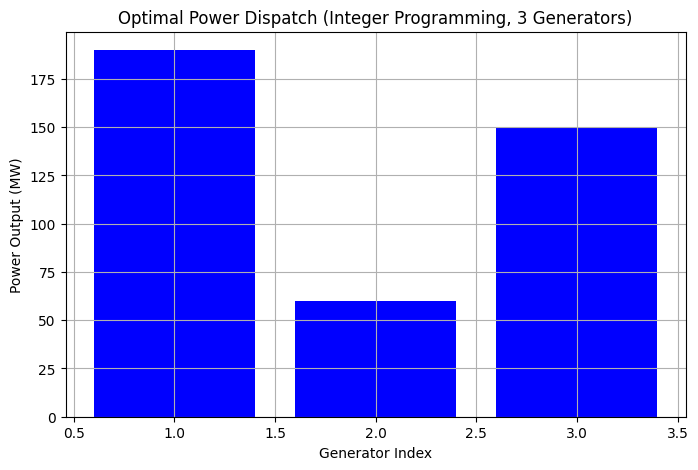

In [9]:
# Plot the power allocation for each generator
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Index")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch (Integer Programming, 3 Generators)")
plt.grid(True)
plt.show()

---

## **Step 7: More Realistic Case (7 Generators)**

Now, let's **extend the problem** to **7 generators** with similar logic.

In [10]:
# Number of generators (expanded case)
num_generators = 7

# Updated generator parameters
fuel_cost = np.array([10, 12, 9, 14, 11, 13, 8])

# Minimum and maximum power each generator can produce (MW)
P_min = np.array([50, 60, 40, 70, 55, 65, 45])
P_max = np.array([200, 180, 150, 220, 190, 210, 160])

# Total power demand (MW)
P_demand = 800

print("Generator data is set up for the 7-generator integer dispatch scenario.")


Generator data is set up for the 7-generator integer dispatch scenario.



---

### **Solve for 7 Generators Using Integer Programming**

In [12]:
# Convert fuel cost to cost per block
block_cost = fuel_cost * block_size  # Example: if fuel_cost[i] = 10, then per 10MW block = 10*10 = 100

# Compute minimum and maximum number of blocks per generator
min_blocks = np.ceil(P_min / block_size).astype(int)  # Example: 50/10 = 5 blocks
max_blocks = np.floor(P_max / block_size).astype(int)  # Example: 200/10 = 20 blocks

# Total number of blocks required to meet demand
total_blocks = P_demand // block_size  # Example: 800/10 = 80 blocks

# Update the constraint for power balance
power_balance_constraint = LinearConstraint(np.ones((1, num_generators)), total_blocks, total_blocks)

# Define integer constraints for all generators
integer_constraints = np.ones(num_generators, dtype=int)  # Must be 1 for integer variables

# Bounds: Convert list of tuples into separate lower and upper bound arrays
lb = min_blocks.astype(float)  # Lower bounds as float
ub = max_blocks.astype(float)  # Upper bounds as float
bounds = (lb, ub)  # Tuple of lower and upper bounds

print("Generator data is set up for the 7-generator integer dispatch scenario.")

# Solve the integer programming problem for 7 generators
result = milp(c=block_cost, constraints=[power_balance_constraint], integrality=integer_constraints, bounds=bounds)

# Extract results
x_opt = result.x.astype(int)
total_cost = result.fun

print("\nOptimal Power Dispatch for 7 Generators (Integer Programming):")
print(x_opt)

# Convert blocks to MW
P_opt = x_opt * block_size
print("\nCorresponding total MW per generator:")
print(P_opt)

print(f"\nTotal Cost: ${total_cost:.2f}")


Generator data is set up for the 7-generator integer dispatch scenario.

Optimal Power Dispatch for 7 Generators (Integer Programming):
[20  6 15  7  9  7 16]

Corresponding total MW per generator:
[200  60 150  70  90  70 160]

Total Cost: $8230.00


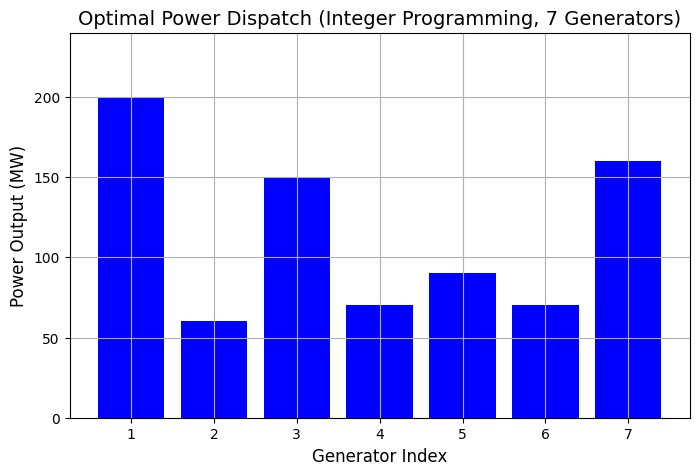

In [13]:
# ===================================================================================
# **🔹 Step 8: Visualization**
# ===================================================================================

# **Plot the power allocation for each generator**
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Index", fontsize=12)
plt.ylabel("Power Output (MW)", fontsize=12)
plt.title("Optimal Power Dispatch (Integer Programming, 7 Generators)", fontsize=14)
plt.grid(True)
plt.xticks(range(1, num_generators + 1))
plt.ylim([0, max(P_max) + 20])  # Adjust y-axis limit
plt.show()